In [27]:
import sys, itertools
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn, time, math
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix

if '../tools' not in sys.path:
    sys.path.append('../tools')
from helper_functions import * 

import warnings
warnings.filterwarnings('ignore')

Using existing FVs from file ../generated-fv/FV3-3.mat
N = 1000
MFCC training feature ranges means [-0.0201, 0.0090] sds [0.0202, 0.0614]
X.shape (1000, 960)


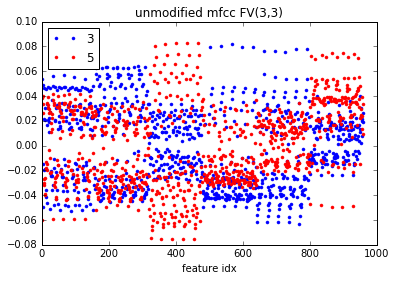

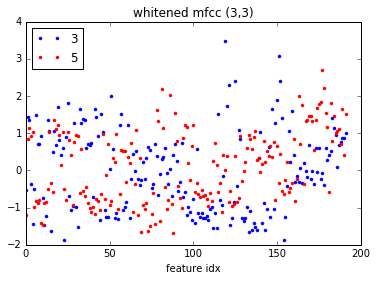

Train shape (900, 960) riffled (900, 192)
Test shape (100, 960) riffled (100, 192)
Default SVM perf orig 0.69 riff 0.69


In [26]:
num_clusters, exemplar = 3, 3
X, Y = load_all_fv(num_clusters, exemplar) #load_all_fv(num_clusters, exemplar)
print('X.shape', X.shape)

T = num_clusters * 2
t = (exemplar - (1 if exemplar % 2 == 0 else 0)) * 2 - 1

trX, teX, trY, teY = train_test_split(X, Y, stratify=Y,
                                      random_state=1, test_size=0.1)
axes = plt.subplots()[1]
idx = np.where(trY != trY[0])[0][1]
#idx = np.where(trY == trY[0])[0][1] # same label
axes.plot(trX[0], c='b', marker='.', linestyle='', label=trY[0])
axes.plot(trX[idx], c='r', marker='.', linestyle='', label=trY[idx])
axes.legend(loc=2)

plt.xlabel('feature idx')
plt.title('unmodified mfcc FV(3,3)')
plt.show()

def whiten_train_test(train, test):
    return whiten(train), whiten(test, source=train)

def modify(x, t, T): return np.average(riffle(x, t, T), axis=2)

trXadj, teXadj = whiten_train_test(trX, teX)
trXrff, teXrff = whiten_train_test(*((modify(x, t, T) for x in (trX, teX))))
axes = plt.subplots()[1]
axes.plot(trXrff[0], c='b', marker='.', linestyle='', label=trY[0])
axes.plot(trXrff[idx], c='r', marker='.', linestyle='', label=trY[idx])
axes.legend(loc=2)


plt.xlabel('feature idx')
plt.title('whitened mfcc (3,3)')
plt.show()

print('Train shape {} riffled {}'.format(trXadj.shape, trXrff.shape))
print('Test shape {} riffled {}'.format(teXadj.shape, teXrff.shape))
print('Default SVM perf orig {} riff {}'.format(
        SVC(C=1.0).fit(trXadj, trY).score(teXadj, teY),
        SVC(C=1.0).fit(trXrff, trY).score(teXrff, teY)))

Using existing FVs from file ../generated-fv/FV8-5.mat
N = 1000
MFCC training feature ranges means [-0.0064, 0.0057] sds [0.0095, 0.0275]
X.shape (1000, 4608)


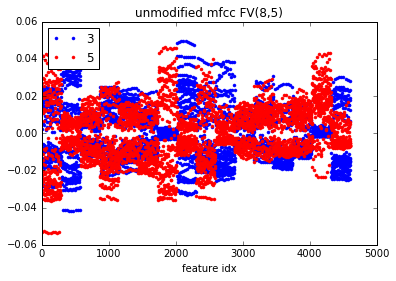

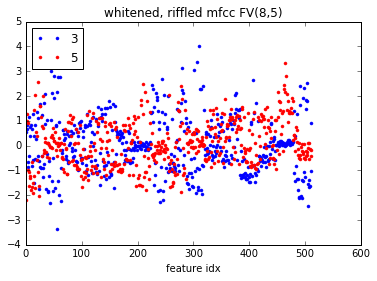

Train shape (900, 4608) riffled (900, 512)
Test shape (100, 4608) riffled (100, 512)
Default SVM perf orig 0.67 riff 0.68


In [24]:
num_clusters, exemplar = 8, 5
X, Y = load_all_fv(num_clusters, exemplar) #load_all_fv(num_clusters, exemplar)
print('X.shape', X.shape)

T = num_clusters * 2
t = (exemplar - (1 if exemplar % 2 == 0 else 0)) * 2 - 1

trX, teX, trY, teY = train_test_split(X, Y, stratify=Y,
                                      random_state=1, test_size=0.1)
axes = plt.subplots()[1]
idx = np.where(trY != trY[0])[0][1]
#idx = np.where(trY == trY[0])[0][1] # same label
axes.plot(trX[0], c='b', marker='.', linestyle='', label=trY[0])
axes.plot(trX[idx], c='r', marker='.', linestyle='', label=trY[idx])
axes.legend(loc=2)

plt.xlabel('feature idx')
plt.title('unmodified mfcc FV(8,5)')
plt.show()

def whiten_train_test(train, test):
    return whiten(train), whiten(test, source=train)

def modify(x, t, T): return np.average(riffle(x, t, T), axis=2)

trXadj, teXadj = whiten_train_test(trX, teX)
trXrff, teXrff = whiten_train_test(*((modify(x, t, T) for x in (trX, teX))))
axes = plt.subplots()[1]
axes.plot(trXrff[0], c='b', marker='.', linestyle='', label=trY[0])
axes.plot(trXrff[idx], c='r', marker='.', linestyle='', label=trY[idx])
axes.legend(loc=2)


plt.xlabel('feature idx')
plt.title('whitened, riffled mfcc FV(8,5)')
plt.show()

print('Train shape {} riffled {}'.format(trXadj.shape, trXrff.shape))
print('Test shape {} riffled {}'.format(teXadj.shape, teXrff.shape))
print('Default SVM perf orig {} riff {}'.format(
        SVC(C=1.0).fit(trXadj, trY).score(teXadj, teY),
        SVC(C=1.0).fit(trXrff, trY).score(teXrff, teY)))

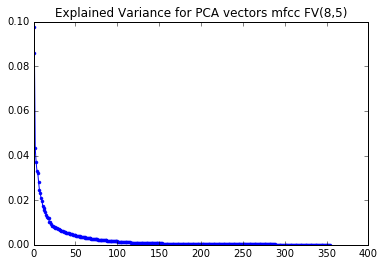

In [20]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True, n_components=0.99).fit(trX)
plt.plot(pca.explained_variance_ratio_, '.-')
plt.title('Explained Variance for PCA vectors mfcc FV(8,5)')
plt.show()

# PCA shows that all features are pretty important, there's little room for additional dimensional reduction

In [21]:
D = load_all_nonmfc()
for k, v in D.items():
    print(k, v.shape, np.any(np.isnan(v)))

Read in eng for all genres
Read in chroma for all genres
Read in t for all genres
Read in keystrength for all genres
Read in brightness for all genres
Read in zerocross for all genres
Read in roughness for all genres
Read in inharmonic for all genres
Read in hcdf for all genres
chroma (1000, 12, 1222) False
hcdf (1000, 1222) False
inharmonic (1000, 1222) True
keystrength (1000, 12, 1222) False
eng (1000, 1222) False
t (1000, 1222) False
brightness (1000, 1222) False
roughness (1000, 1222) False
zerocross (1000, 1222) False


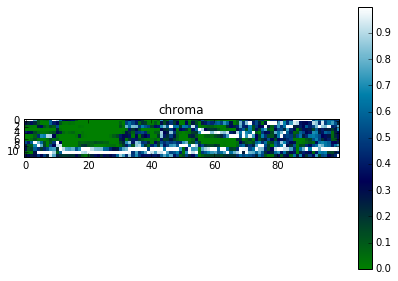

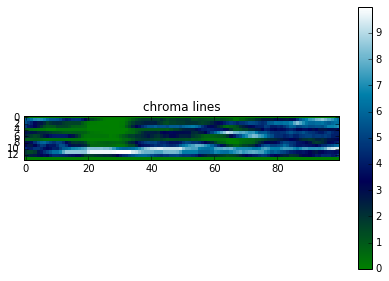

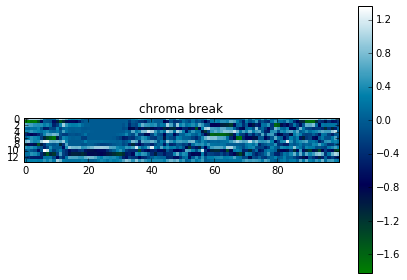

In [22]:
from scipy.signal import convolve2d

plot_matrix(D['chroma'][0][:,300:400], 'chroma')
plt.show()
#plot_matrix(D['chroma'][1][:,300:400], 'chroma')
#plt.show()

line_finder = [np.zeros(10),
               np.repeat(1, 10),
               np.zeros(10)]
pattern_break = [[0, 0, 1], [0, -1, -1], [0, 0, 1]]
from scipy.signal import convolve2d

plot_matrix(convolve2d(D['chroma'][0], line_finder)[:,300:400], 'chroma lines')
plt.show()
plot_matrix(convolve2d(D['chroma'][0], pattern_break)[:,300:400], 'chroma break')
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegressionCV
num_clusters, exemplar = 3, 3
X, Y = load_all_fv(num_clusters, exemplar) 
C, Y = load_chroma_fv(num_clusters, exemplar)
trX, teX, trC, teC, trY, teY = train_test_split(X, C, Y, stratify=Y,
                                      random_state=1, test_size=(1/8))
trX, teX = whiten_train_test(trX, teX)
trC, teC = whiten_train_test(trC, teC)
regMFCC = LogisticRegressionCV(multi_class='multinomial', solver='lbfgs', n_jobs=8, cv=8)
regMFCC.fit(trX, trY)
print('softmax mfcc accuracies: train {} test {}'.format(regMFCC.score(trX, trY), regMFCC.score(teX, teY)))
regChroma = LogisticRegressionCV(multi_class='multinomial', solver='lbfgs', n_jobs=8, cv=8)
regChroma.fit(trC, trY)
print('softmax chroma accuracies: train {} test {}'.format(regChroma.score(trC, trY), regChroma.score(teC, teY)))

Using existing FVs from file ../generated-fv/FV3-3.mat
N = 1000
MFCC training feature ranges means [-0.0201, 0.0090] sds [0.0202, 0.0614]
Using existing FVs from file ../generated-fv/FVC3-3.mat
N = 1000
chroma training feature ranges means [-0.0107, 0.0108] sds [0.0376, 0.0670]
softmax mfcc accuracies: train 0.9068181818181819 test 0.6583333333333333
softmax chroma accuracies: train 0.8636363636363636 test 0.5333333333333333


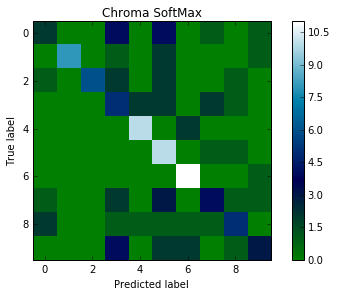

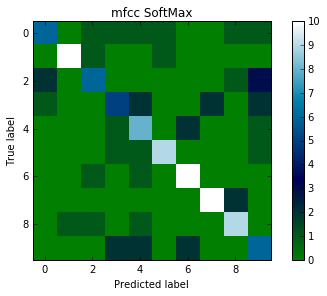

X (1000, 960) C (1000, 360)


In [34]:
plot_confusion_matrix(confusion_matrix(teY, regChroma.predict(teC)), title='Chroma SoftMax')
plt.show()
plot_confusion_matrix(confusion_matrix(teY, regMFCC.predict(teX)), title='mfcc SoftMax')
plt.show()
print('X', X.shape, 'C', C.shape)